# Sentiment Analysis - Twitters

## 1. Objective


####  What is the most common evaluation for TD? 

This dataset is based on the Td Canada Trust Reviews and Complaints from July 2018 to July 2019.

## 2. Quick Look at the Raw Data

In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'/Users/apple/Desktop/project with Carlo/Tweets'

In [3]:
df = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/tweets_first_6_months.csv',delimiter='	')
df.count()

tweet_ID      77085
screenname    77085
created_at    77085
tweet         77082
dtype: int64

In [4]:
df = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/tweets_last_6_months.csv',delimiter='	')
df.count()

tweet_ID      83762
screenname    83762
created_at    83762
tweet         83762
dtype: int64

In [5]:
df = pd.read_csv('/Users/apple/Desktop/project with Carlo/Tweets/tweets_first_6_months.csv')   
df.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/tweets_all.csv',encoding="utf_8_sig",index=False)
 
df = pd.read_csv('/Users/apple/Desktop/project with Carlo/Tweets/tweets_last_6_months.csv')
df.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/tweets_all.csv',encoding="utf_8_sig",index=False, header=False, mode='a+')

In [6]:
df = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/tweets_all.csv',delimiter='	')
df.count()

tweet_ID      160847
screenname    160843
created_at    160843
tweet         160840
dtype: int64

In [7]:
df.head()

,tweet_ID,screenname,created_at,tweet
0,1053301420370223104,axjiwa,2018-10-19,TD bank sucks ass
1,1019219742307938307,tmj_mep_mgmt,2018-07-17,Looking to join TD Bank TDCareers company2 or ...
2,1053696316004544512,doriancraft,2018-10-20,Connor Noland throws his first career TD pass ...
3,1023928757600624642,unbalumni,2018-07-30,Just graduated Your alumni benefits include ac...
4,1041039430088179717,ukfansallday,2018-09-15,Danny Clark with his 1st career TD run GetUp W...


-   We can potentially refine sentiment analysis with tweet column
-   We can label each review based on sentiment

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160847 entries, 0 to 160846
Data columns (total 4 columns):
tweet_ID      160847 non-null object
screenname    160843 non-null object
created_at    160843 non-null object
tweet         160840 non-null object
dtypes: object(4)
memory usage: 4.9+ MB


In [9]:
df.shape

(160847, 4)

In [10]:
df = df.dropna(subset=['tweet_ID','screenname','tweet'],axis=0)
df.shape

(160840, 4)

In [11]:
df['tweet_ID']=df['tweet_ID'].astype('int')
df['created_at'] = pd.to_datetime(df['created_at'])
df.dtypes

tweet_ID               int64
screenname            object
created_at    datetime64[ns]
tweet                 object
dtype: object

- Modify data type : tweet_ID as int64 and created_at as datatime

In [12]:
x = df['screenname'].value_counts()
x

TDBank_US         9705
TD_Canada         6204
TopEmployers40    1950
TD_Insurance      1336
YoungEmployers     916
                  ... 
globalhalifax        1
john_lambe           1
irsp2017             1
Brian_Mic            1
thucnhi21            1
Name: screenname, Length: 65071, dtype: int64

## 3. Data Cleaning

From *value_counts* function we can find that institutions linked with TD have a huge number of comments during a year, in order to find the real customers sentiment we need deleted those data from our dataframe.

In [13]:
x.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/number.csv',index=0,header=['N'])

In [14]:
num = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/number.csv')

In [15]:
num.head()

,N
0,9705
1,6204
2,1950
3,1336
4,916


In [16]:
num['N'].value_counts()

1      47904
2       8883
3       3137
4       1507
5        866
       ...  
198        1
102        1
83         1
92         1
287        1
Name: N, Length: 147, dtype: int64

We can find *mode = 1*

**Another way to find mode**


`from scipy import stats
stats.mode(num)[0][0]
`


In [17]:
import numpy as np

In [18]:
np.median(num)

1.0

We can find most users send only one tweets, then we only analysis the tweets context which users send 1-2 tweets during this year.

In [19]:
move = df.groupby('screenname').filter(lambda x:len(x)>2)
df=df[~df.isin(move)]
df['screenname'].value_counts()

Les61Supernor     2
greg_macafee      2
RessyM            2
LopezMaryshu      2
EmadDCE           2
                 ..
scramblesuited    1
M_Urquijo         1
Talsenar          1
m_delgatty        1
thucnhi21         1
Name: screenname, Length: 56787, dtype: int64

In [20]:
df.head()

,tweet_ID,screenname,created_at,tweet
0,1.053301e+18,axjiwa,2018-10-19,TD bank sucks ass
1,NaN,NaN,NaT,NaN
2,NaN,NaN,NaT,NaN
3,NaN,NaN,NaT,NaN
4,1.041039e+18,ukfansallday,2018-09-15,Danny Clark with his 1st career TD run GetUp W...


In [21]:
df = df.dropna(subset = ['screenname'], axis=0)

When we review the raw data, we find that if users' name contain 'TD', there is a high probability that users are TD's employees. Therefore we delete the data whose screenname include 'TD'

In [22]:
df = df[~df['screenname'].str.contains("TD",na=False)]

In [23]:
df = df.dropna(subset = ['screenname'], axis=0)

In [24]:
df['created_at'].value_counts(sort=False,bins=12)

(2018-06-29 14:29:45.599999999, 2018-08-02]    4248
(2018-08-02, 2018-09-04]                       4473
(2018-09-04, 2018-10-07]                       8371
(2018-10-07, 2018-11-09]                       6182
(2018-11-09, 2018-12-12]                       5249
(2018-12-12, 2019-01-14]                       4528
(2019-01-14, 2019-02-16]                       5676
(2019-02-16, 2019-03-21]                       5195
(2019-03-21, 2019-04-23]                       4844
(2019-04-23, 2019-05-26]                       6840
(2019-05-26, 2019-06-28]                       5273
(2019-06-28, 2019-07-31]                       4426
Name: created_at, dtype: int64

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of tweets')

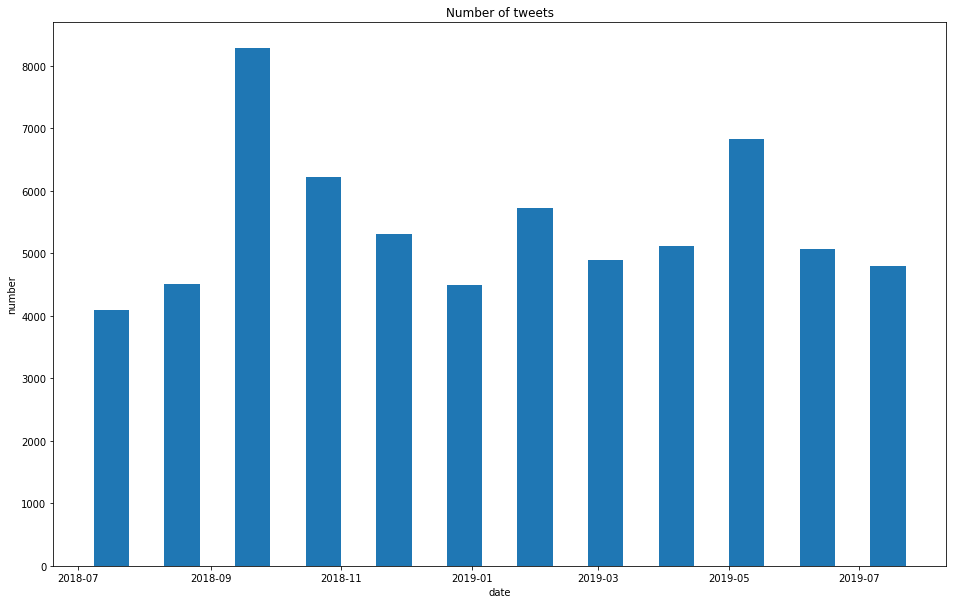

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.hist(df['created_at'],bins=12,rwidth=0.5)
plt.xlabel('date')
plt.ylabel('number')
plt.title('Number of tweets')

**Question need be solved during the next step analysis : why (2018-09-04, 2018-10-07] have so many tweets?**

In [26]:
df.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/clean_data.csv',index=0,header=1)

In [27]:
df.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/text.csv',columns=['tweet'],index=0,header=1)

In [2]:
text = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/text.csv')
text.head()

,tweet
0,TD bank sucks ass
1,Danny Clark with his 1st career TD run GetUp W...
2,LaBar31 Saquon is also 14th in receiving with ...
3,TDCanada Web Business Banking site is downstre...
4,TD Bank to add 200 advisers to help wealthmana...


In [29]:
# Calculate the length of the sentence and the frequency at which it appears
text['length'] = text['tweet'].apply(lambda x: len(x))
len_df = text.groupby('length').count()
sent_length = len_df.index.tolist()
sent_freq = len_df['tweet'].tolist()

In [30]:
text['length'].value_counts()

112    4607
111    4449
113    4080
110    3606
109    2698
       ... 
6         2
5         1
141       1
139       1
142       1
Name: length, Length: 137, dtype: int64

<module 'matplotlib.pyplot' from '/Users/apple/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

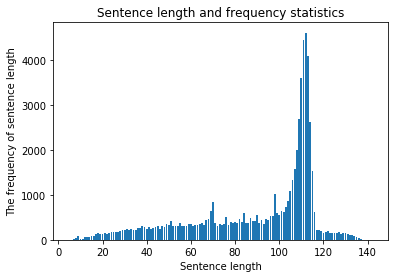

In [31]:
import matplotlib.pyplot as plt

# Draw sentence length and frequency statistics
plt.bar(sent_length, sent_freq)
plt.title("Sentence length and frequency statistics")
plt.xlabel("Sentence length")
plt.ylabel("The frequency of sentence length")
plt.savefig("/Users/apple/Desktop/project with Carlo/Tweets/Sentence length and frequency statistics.png")
plt

length|frequency|
------|---------|
112   | 4607    |
111   | 4449    |
113   | 4080    |



--------2019-11-21---

## 4. Sentiment analysis

### 4.1 Cleaned Data

In [3]:
# remove special characters, numbers, punctuations
text['tidy_tweet'] = text['tweet'].str.replace("[^a-zA-Z#]", " ")

In [5]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt  
# remove unuseless word
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "TD")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "bank")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "career")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "tdcanada")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "td")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "Bank")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "Career")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "TDcanada")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "canada")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "Canada")

In [6]:
#deleted word len < 3

text['tidy_tweet'] = text['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### 4.2 Segmentation data

In [7]:
tokenized_tweet = text['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                              [sucks]
1    [Danny, Clark, with, GetUp, WeAreUK, Lexington...
2    [LaBar, Saquon, also, receiving, with, while, ...
3                     [Business, site, downstressfull]
4    [advisers, help, wealthmanagement, unit, reach...
Name: tidy_tweet, dtype: object

In [8]:
import nltk

In [9]:
#stem extraction
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

text['clean_tweet'] = tokenized_tweet

In [10]:
text['clean_tweet'].head()

0                                                 suck
1    danni clark with getup weareuk lexington kentucki
2    labar saquon also receiv with while lindsay wi...
3                              busi site downstressful
4    advis help wealthmanag unit reach profit goal ...
Name: clean_tweet, dtype: object

### 4.3 Wordcloud

In [14]:
# bug No module named 'wordcloud'
#import sys
#print(sys.executable)

#/Users/apple/opt/anaconda3/bin/python -m pip install wordcloud

/Users/apple/opt/anaconda3/bin/python


In [70]:
#import wordcloud

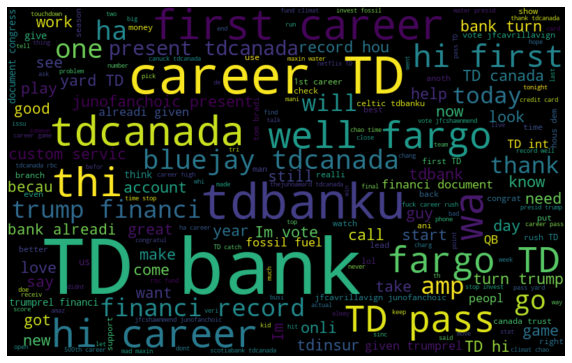

In [27]:
#all_words = ' '.join([text for text in text['tidy_tweet']])
#from wordcloud import WordCloud
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

#plt.figure(figsize=(10, 7))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis('off')
#plt.show()

* Recleaned data (delete word TD, bank, career, tdcanada, canada)

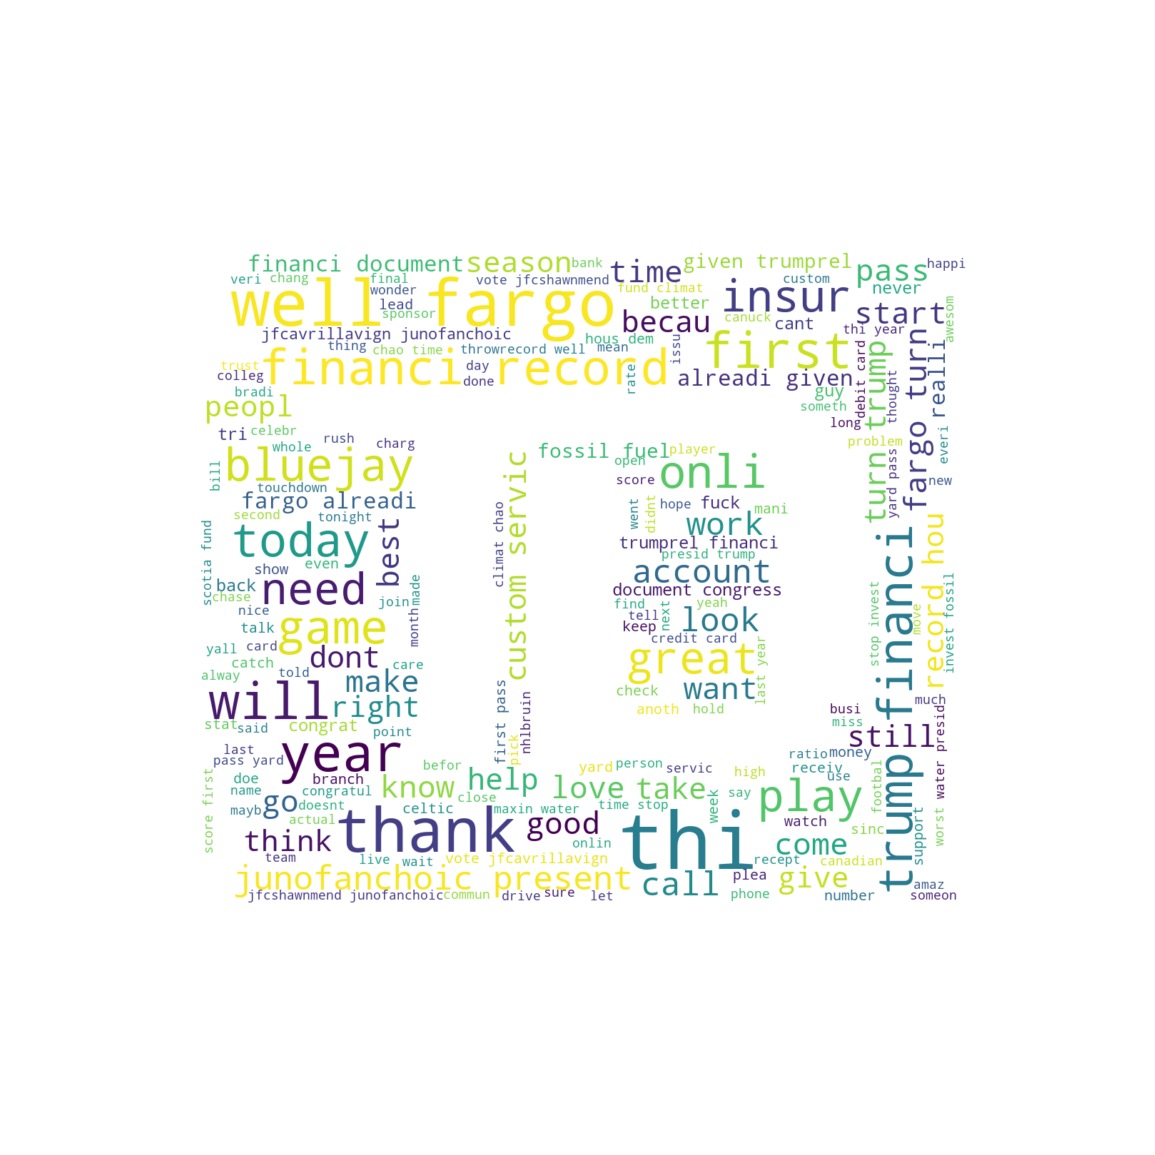

In [12]:
import matplotlib.pyplot as plt
import wordcloud

all_words = ' '.join([text for text in text['clean_tweet']])

import imageio
mk = imageio.imread("/Users/apple/Desktop/project with Carlo/Tweets/TD-bank.jpg")
w = wordcloud.WordCloud(mask=mk)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=500,mask=mk, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(30, 21))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 4.4 Tweets analysis

#### Textblob

In [75]:
#python -m pip install -U textblob

In [13]:
from textblob import TextBlob
import re
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [14]:
# We create a column with the result of the analysis:
text['SA'] = np.array([ analize_sentiment(tweet) for tweet in text['clean_tweet'] ])

In [15]:
pos_tweets = [ tweet for index, tweet in enumerate(text['clean_tweet']) if text['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(text['clean_tweet']) if text['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(text['clean_tweet']) if text['SA'][index] < 0]

In [16]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(text['clean_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(text['clean_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(text['clean_tweet'])))

Percentage of positive tweets: 29.09425005742286%
Percentage of neutral tweets: 57.863869535257635%
Percentage de negative tweets: 13.041880407319502%


**we can found that 57.86% tweets are neutral comments, around 29% tweets are positive comments, 13% are negative comments.**

### 4.5 Negative tweets analysis

In [22]:
neg = text.loc[text['SA'] < 0]
neg.head()

,tweet,tidy_tweet,clean_tweet,SA
7,Darnolds first career rushing TD puts him 18 b...,Darnolds first rushing puts behind Brady,darnold first rush put behind bradi,-1
9,2553 Bake Turner in the game for the Diablos H...,Bake Turner game Diablos gets first Diablos lead,bake turner game diablo get first diablo lead,-1
20,cibc I do not have a cibc account Cheque was a...,cibc have cibc account Cheque fake counter che...,cibc have cibc account chequ fake counter cheq...,-1
25,One of these QB had a career TDINT of 910 goin...,these going into this game sudden cream crop,these go into thi game sudden cream crop,-1
36,New To Canada Mortgages You Dont Have To Conti...,Mortgages Dont Have Continue RentingYou Home w...,mortgag dont have continu rentingy home with d...,-1


In [24]:
neg.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/neg.csv',columns=['clean_tweet'],index=0,header=1)
neg = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/neg.csv')
neg.head()

,clean_tweet
0,darnold first rush put behind bradi
1,bake turner game diablo get first diablo lead
2,cibc have cibc account chequ fake counter cheq...
3,these go into thi game sudden cream crop
4,mortgag dont have continu rentingy home with d...


In [29]:
neg.count()

clean_tweet    8517
dtype: int64

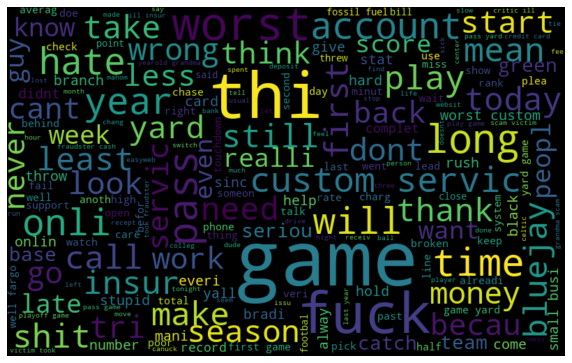

In [30]:
import matplotlib.pyplot as plt
import wordcloud

all_words = ' '.join([text for text in neg['clean_tweet']])


from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()